In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
df1=pd.read_excel("data/python modelling.xlsx",sheet_name="UCS")
df2=pd.read_excel("data/python modelling.xlsx",sheet_name="Flexure")
df3=pd.read_excel("data/python modelling.xlsx",sheet_name="%Wt Loss")
df4=pd.read_excel("data/python modelling.xlsx",sheet_name="UCSd")

In [3]:
df1.head()

,UCS (Y),X1-MOLARITY,X2 CURING AGE,X3- % FLY ASH,X4- % GGBS
0,0.704,0.5,7,80,20
1,0.740,0.5,7,80,20
2,0.970,0.5,7,80,20
3,0.900,0.5,7,80,20
4,1.020,0.5,28,80,20


In [4]:
df2.head()

,Flexure Strength (Y),X1-MOLARITY,X2 CURING AGE,X3- % FLY ASH,X4- % GGBS
0,0.16456,0.5,7,80,20
1,0.16830,0.5,7,80,20
2,0.20383,0.5,7,80,20
3,0.20196,0.5,7,80,20
4,0.22000,0.5,28,80,20


In [5]:
df3.head()

,weight loss (Y),X1-MOLARITY,X3- % FLY ASH,X4- % GGBS
0,8.13,1,80,20
1,7.02,1,80,20
2,7.42,1,80,20
3,8.42,1,80,20
4,6.47,2,80,20


In [6]:
df4.head()

,UCSd (Y),X1-MOLARITY,X3- % FLY ASH,X4- % GGBS
0,4.870,1,80,20
1,5.474,1,80,20
2,6.840,1,80,20
3,6.020,1,80,20
4,7.020,2,80,20


In [16]:
UCS=df1["UCS (Y)"]
Flexure=df2["Flexure Strength (Y)"]
Wtloss=df3["weight loss (Y)"]
UCSd=df4["UCSd (Y)"]

In [17]:
df=pd.read_excel("data/python modelling.xlsx",sheet_name="Targets")

In [18]:
df.head()

,UCS (Y),Flexure Strength (Y),weight loss (Y),UCSd (Y)
0,0.704,0.16456,8.13,4.870
1,0.740,0.16830,7.02,5.474
2,0.970,0.20383,7.42,6.840
3,0.900,0.20196,8.42,6.020
4,1.020,0.22000,6.47,7.020


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UCS (Y)               160 non-null    float64
 1   Flexure Strength (Y)  160 non-null    float64
 2   weight loss (Y)       64 non-null     float64
 3   UCSd (Y)              64 non-null     float64
dtypes: float64(4)
memory usage: 5.1 KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UCS (Y),160.0,5.847119,3.356887,0.3534,3.591518,5.911500,8.265000,13.260000
Flexure Strength (Y),160.0,1.547579,0.907010,0.0790,0.895887,1.633225,2.140000,3.960000
weight loss (Y),64.0,5.997633,1.294778,2.9400,5.220000,6.051400,7.003687,8.740000
UCSd (Y),64.0,11.393965,3.606718,4.5500,8.712500,11.188080,13.765000,19.675925


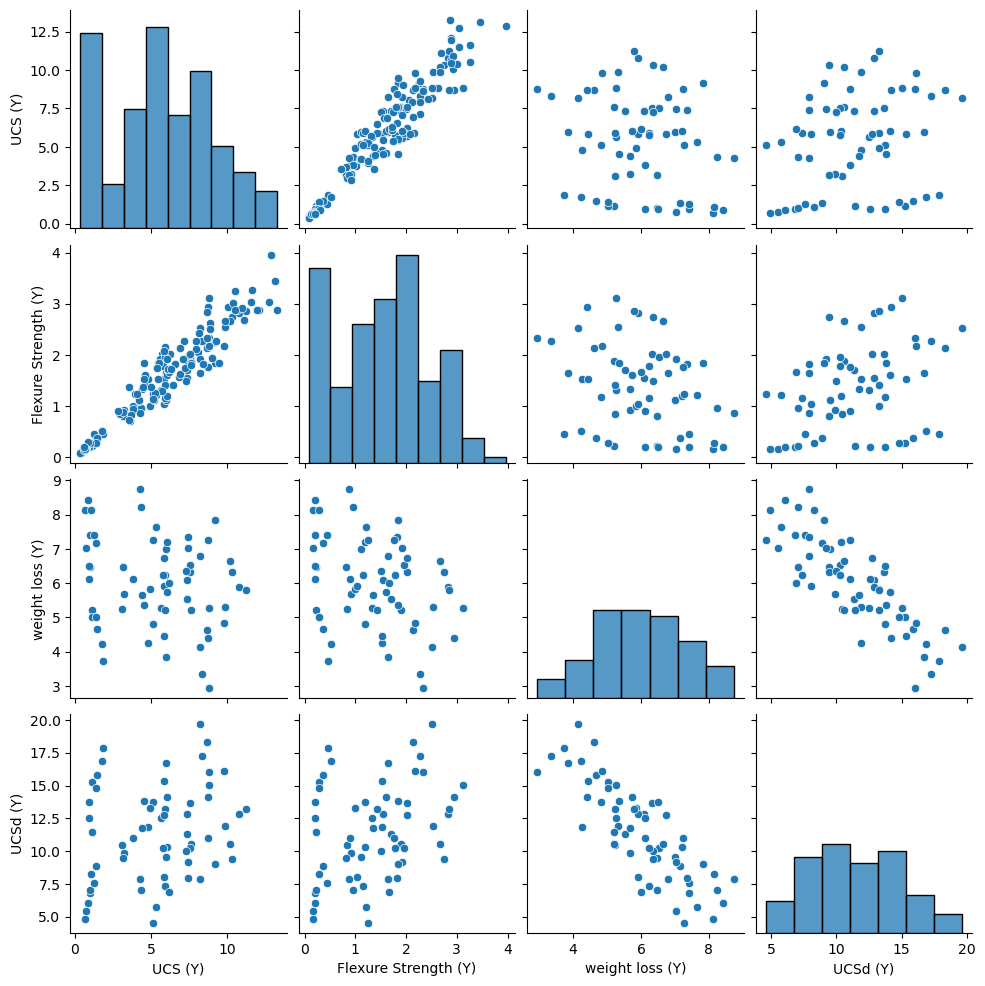

In [34]:
sns.pairplot(df)

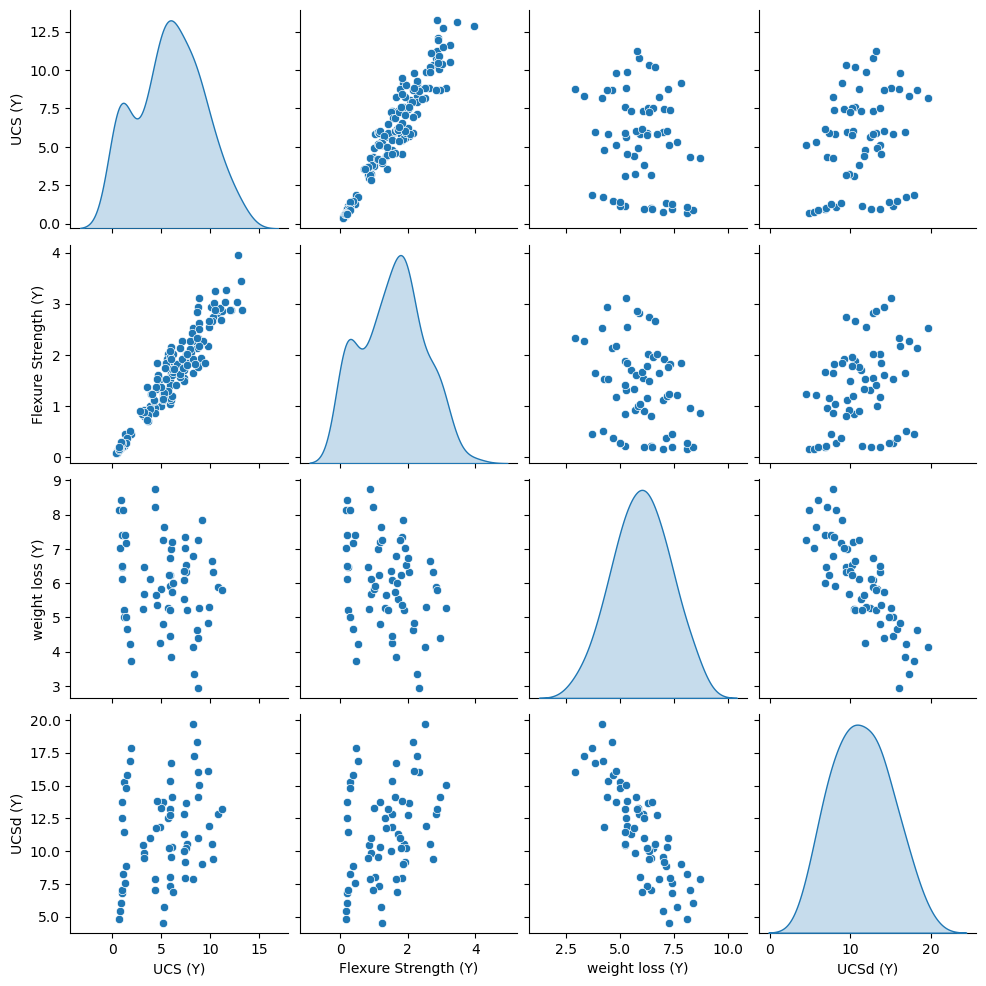

In [28]:
sns.pairplot(df,diag_kind="kde")

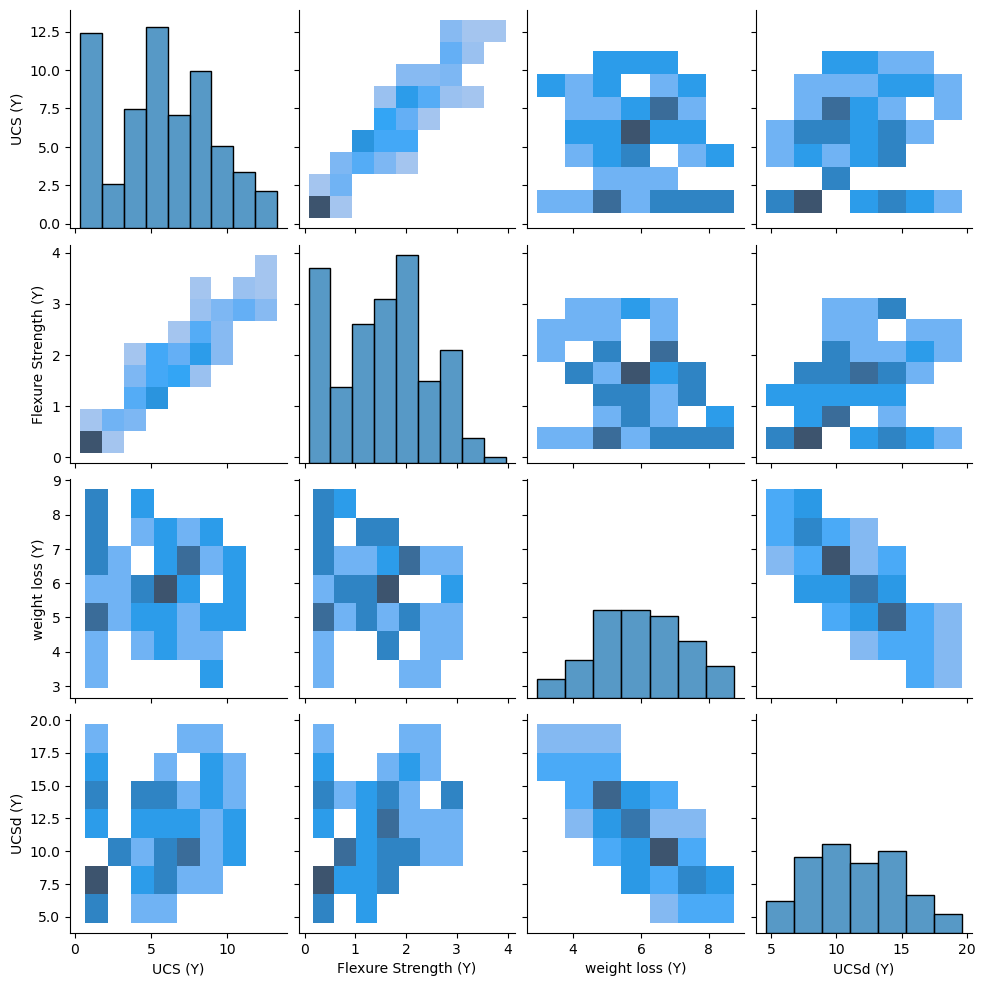

In [29]:
sns.pairplot(df,kind="hist")

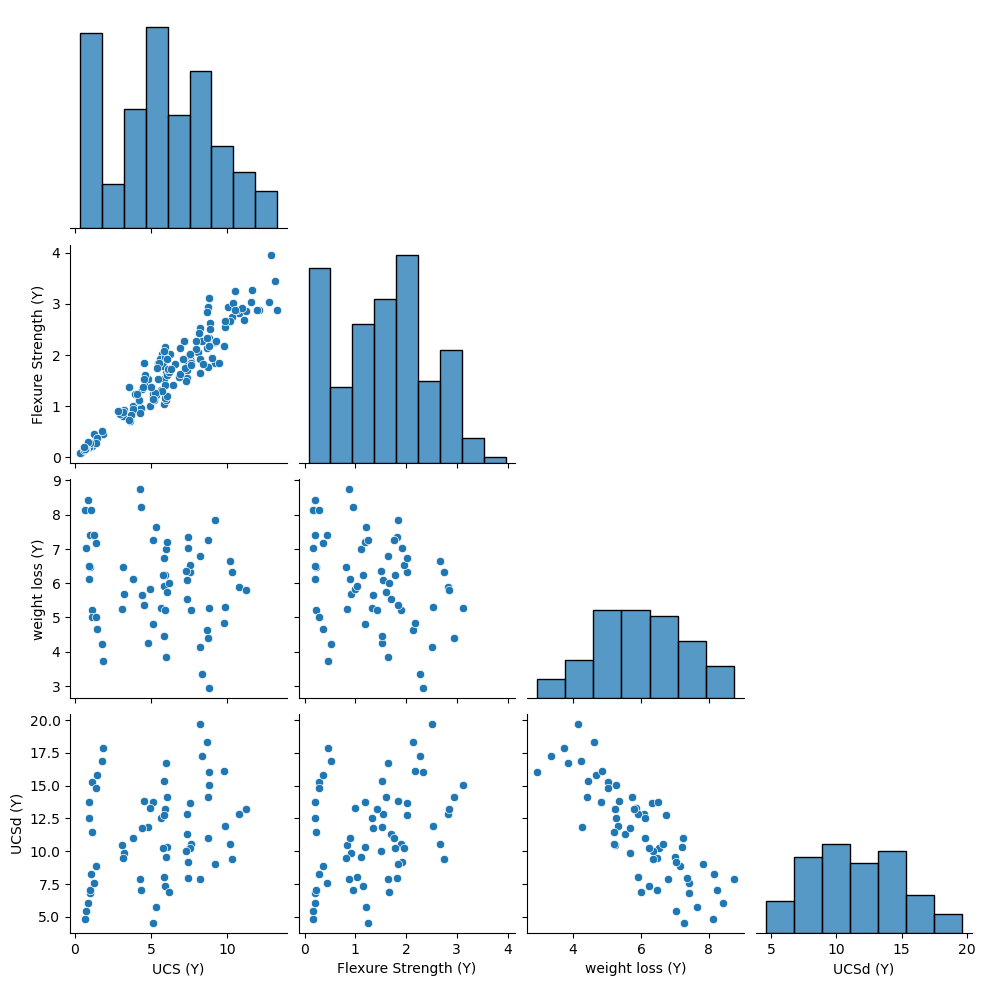

In [30]:
sns.pairplot(df, corner=True)

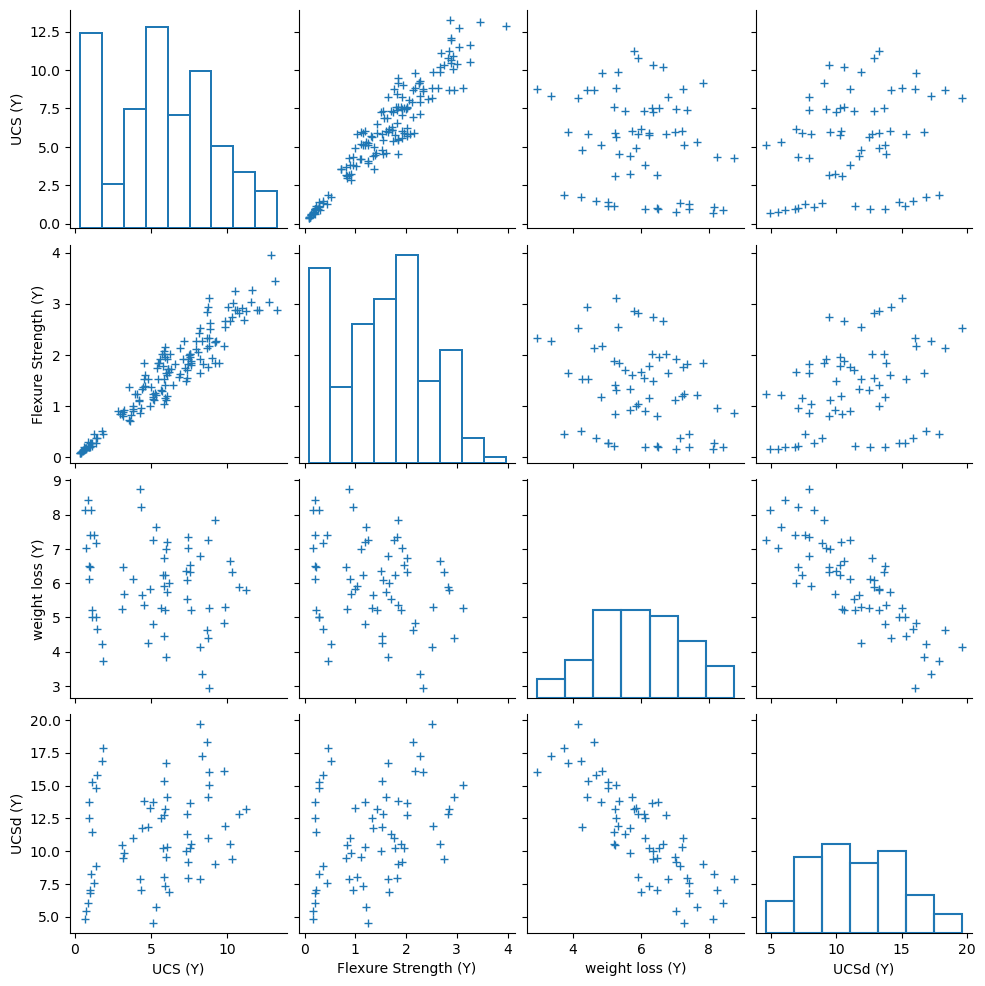

In [31]:
sns.pairplot(
    df,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

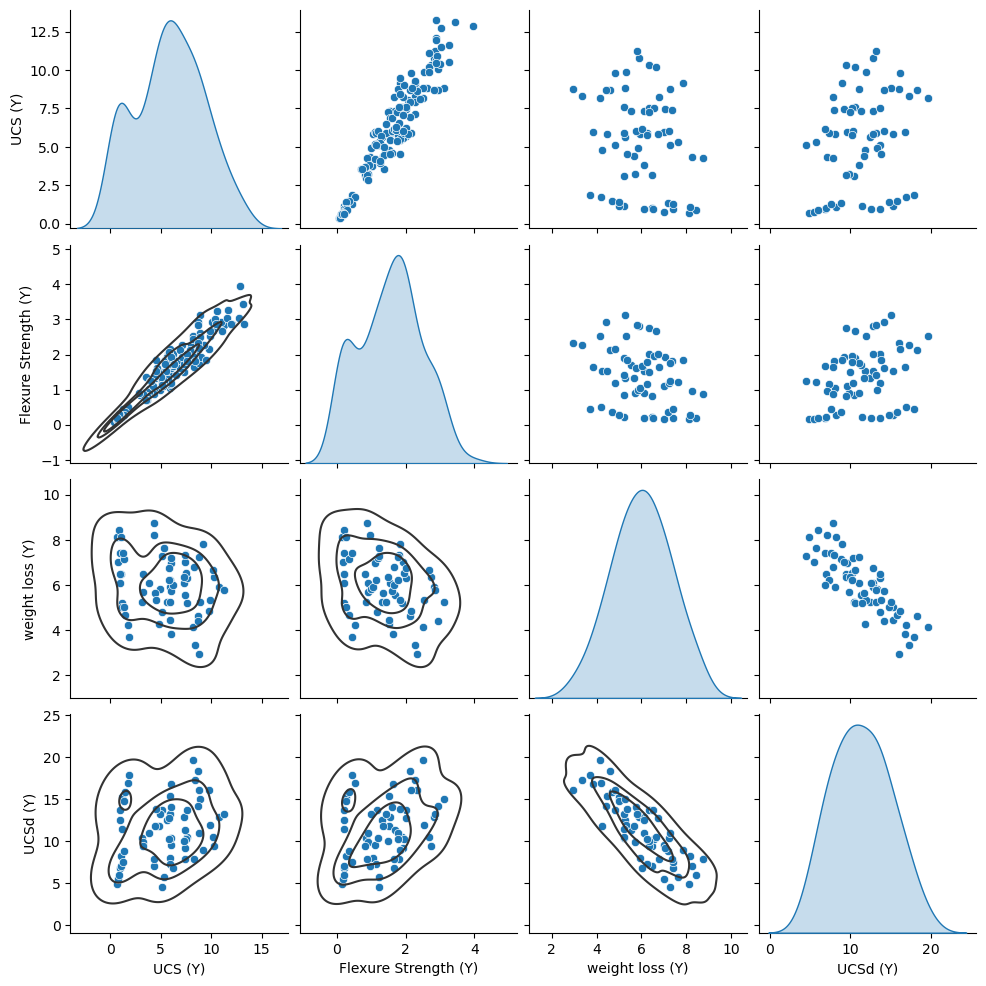

In [32]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

Text(0.5, 1.0, 'Data Spread:Outlier Check')

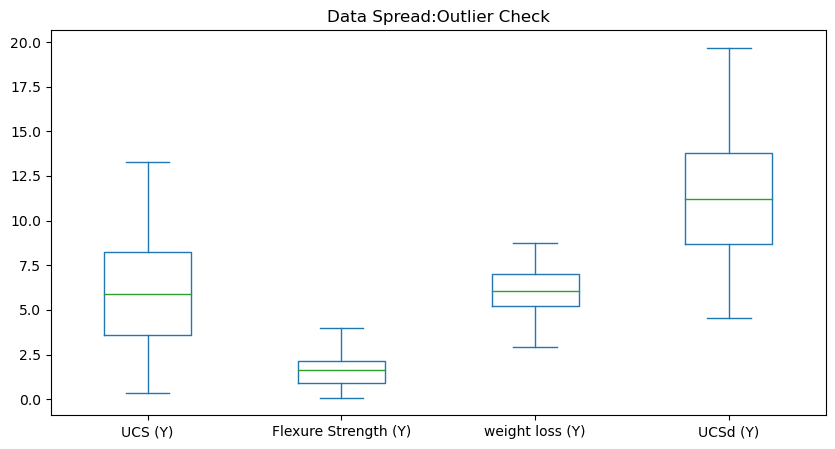

In [35]:
df.plot(kind="box",figsize=(10,5))
plt.title("Data Spread:Outlier Check")

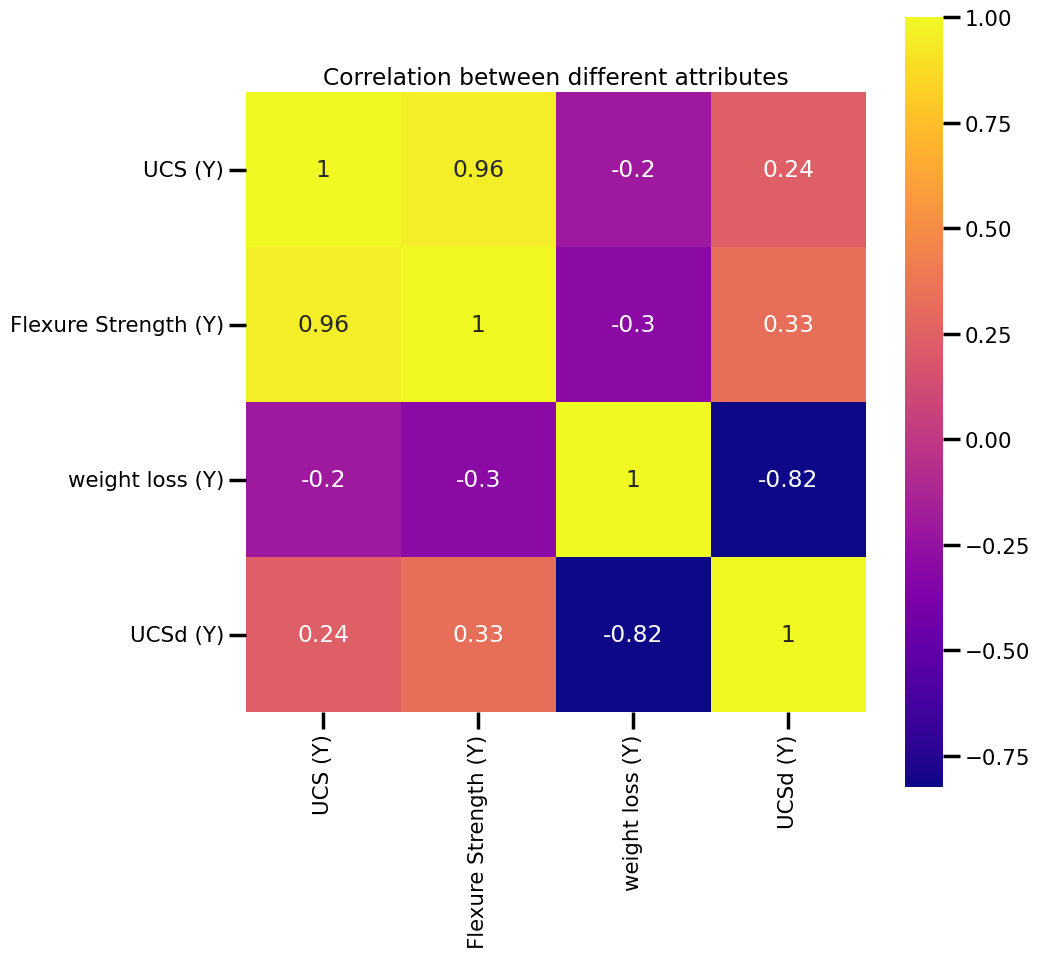

In [40]:
sns.set_context("poster",font_scale=.7)
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='plasma')
plt.title('Correlation between different attributes')
plt.show()

In [51]:
df_a=df.corr()

In [52]:
df_a

,UCS (Y),Flexure Strength (Y),weight loss (Y),UCSd (Y)
UCS (Y),1.000000,0.956969,-0.203581,0.242028
Flexure Strength (Y),0.956969,1.000000,-0.300127,0.331221
weight loss (Y),-0.203581,-0.300127,1.000000,-0.824644
UCSd (Y),0.242028,0.331221,-0.824644,1.000000


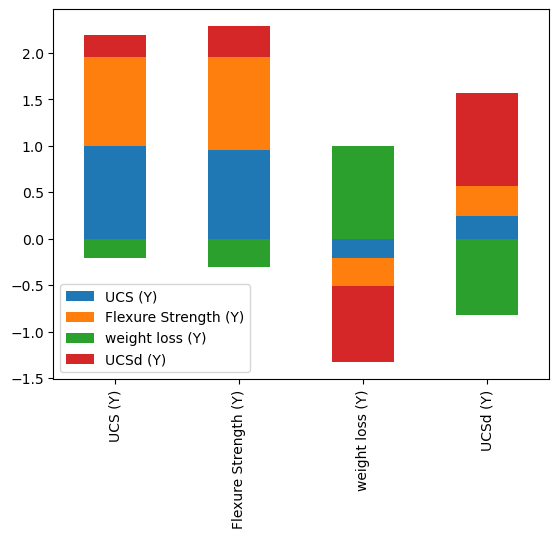

In [67]:
df_a.plot.bar(stacked=True);

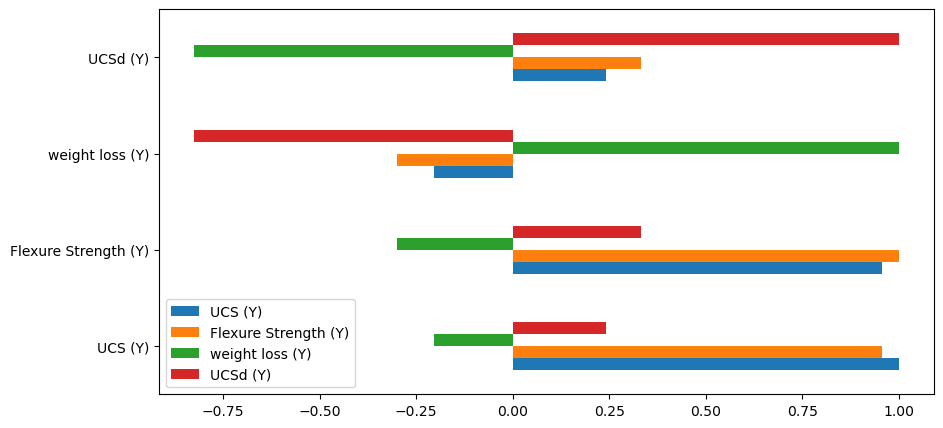

In [75]:
plt.rcdefaults()
sns.set_context(font_scale=.3)

fig=df_a.plot(kind="barh",figsize=(10,5))
fig.set_xlabel="Correltion"
fig.set_ylabe="Parameters"